In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML/Data Visualization/Data-Preparation-and-Visualization/8.Machine-Learning/winequality-red.csv')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#Exploring Variables

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

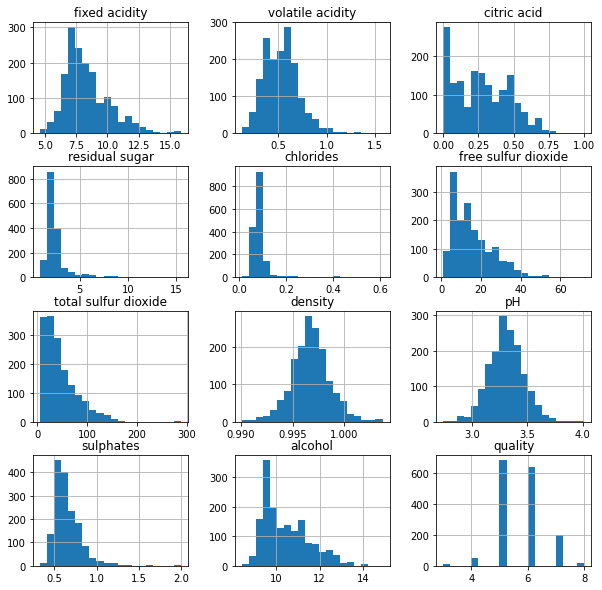

In [8]:
import matplotlib.pyplot as plt
df.hist(bins = 20, figsize= (10,10))
plt.show()

In [6]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


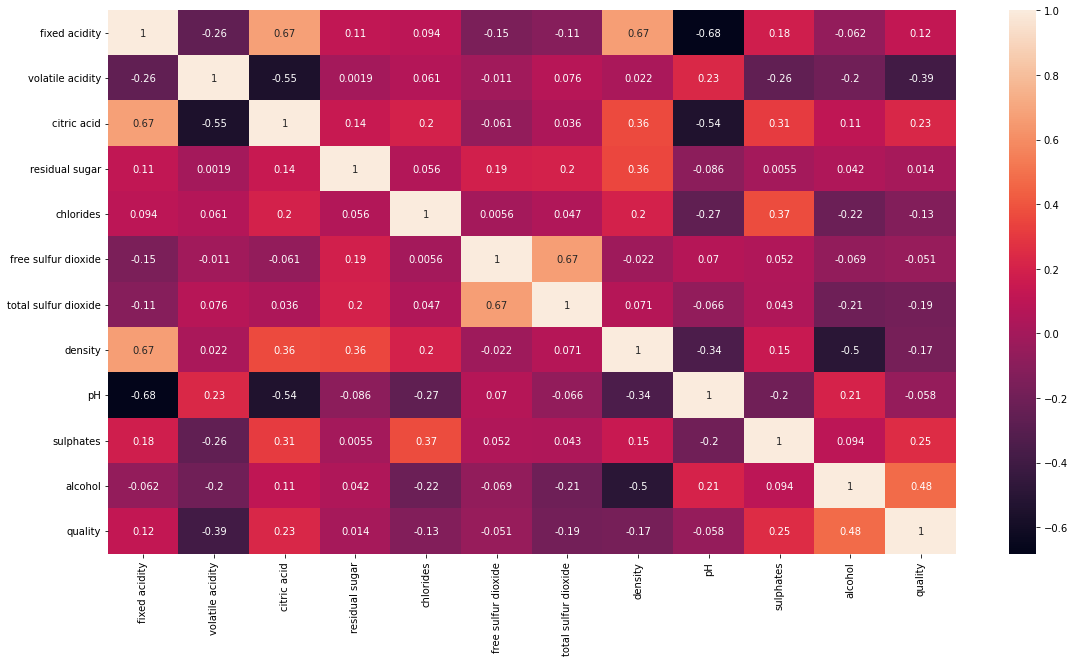

In [10]:
import seaborn
plt.figure(figsize=[19,10])
seaborn.heatmap(df.corr(),annot=True)

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)
print("none")

none


#Regression Problem

In [43]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [19]:
X.shape, y.shape

((1599, 11), (1599,))

## Linear Regression

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
X_train.shape, X_test.shape

((1279, 11), (320, 11))

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [47]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [59]:
y_train = sc.fit_transform(y_train.reshape(-1,1))
y_test = sc.fit_transform(y_test.reshape(-1,1))

In [60]:
y_train

array([[ 0.47],
       [ 0.47],
       [ 0.47],
       ...,
       [-0.77],
       [ 1.71],
       [ 0.47]])

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_pred = regressor.predict(X_test)
# np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-0.38  0.39]
 [-0.75 -0.85]
 [ 0.07  0.39]
 [-0.24 -0.85]
 [ 0.08  0.39]
 [-0.47 -0.85]
 [-0.77 -0.85]
 [-0.68 -0.85]
 [ 0.17 -0.85]
 [ 0.05  0.39]
 [ 0.56  1.63]
 [-0.5  -3.32]
 [-0.1  -0.85]
 [-0.47 -0.85]
 [-0.24  0.39]
 [ 0.97  1.63]
 [-0.64 -0.85]
 [-0.07  1.63]
 [ 1.16  2.86]
 [-0.37 -0.85]
 [-0.37 -0.85]
 [-0.54  0.39]
 [ 0.33 -0.85]
 [ 0.84  0.39]
 [-0.36  0.39]
 [-0.24  0.39]
 [ 0.88  1.63]
 [-0.39  0.39]
 [-0.55 -0.85]
 [ 0.7   0.39]
 [-0.5  -0.85]
 [-0.21 -0.85]
 [ 0.17  0.39]
 [-0.32 -0.85]
 [-0.21  0.39]
 [-0.78 -0.85]
 [ 0.67  1.63]
 [ 0.09 -0.85]
 [-0.01 -2.08]
 [ 0.61  0.39]
 [-0.14 -0.85]
 [-0.51 -0.85]
 [ 0.69  1.63]
 [-0.59 -0.85]
 [ 0.33 -0.85]
 [ 0.27  0.39]
 [ 1.03  1.63]
 [-0.02  0.39]
 [-0.64 -0.85]
 [-0.11  0.39]
 [-0.54 -0.85]
 [-0.82 -0.85]
 [-0.12 -0.85]
 [ 0.89  1.63]
 [-0.85  0.39]
 [-0.81  0.39]
 [ 0.47  0.39]
 [-0.28 -0.85]
 [ 0.22 -0.85]
 [-0.48 -0.85]
 [-0.06 -0.85]
 [ 0.39  1.63]
 [-0.46 -0.85]
 [-0.42  0.39]
 [ 1.03  0.39]
 [-0.28 -0.85]
 [ 0.84  0

In [63]:
mse_regressor = np.sum((y_pred - y_test) ** 2) / len(y_pred)
mse_regressor

0.5922444973857149

In [66]:
from sklearn.metrics import mean_squared_error
print("Test ",mean_squared_error(y_test, y_pred))
print("Train ", mean_squared_error(y_train, regressor.predict(X_train)))

Test  0.5922444973857149
Train  0.652007380646599


In [65]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred), 2))
print("Mean Absolute Perc Error (Σ(|y_pred|/y)/n):", round(np.mean(np.abs((y_test- y_pred)/y_pred)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

R2 (explained variance): 0.41
Mean Absolute Perc Error (Σ(|y_pred|/y)/n): 4.8
Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1


## Polynomial Regression

In [68]:
from sklearn.preprocessing import PolynomialFeatures
output = {}
for i in range(2, 5):
  poly_reg = PolynomialFeatures(degree = i)
  poly_reg.fit(X_train)
  X_train_poly = poly_reg.fit_transform(X_train) 
  X_test_poly = poly_reg.fit_transform(X_test)
  lin_reg = LinearRegression()
  lin_reg.fit(X_train_poly, y_train)
  print("i = ", i)
  print("Test ",mean_squared_error(y_test, lin_reg.predict(X_test_poly)))
  print("Train ", mean_squared_error(y_train, lin_reg.predict(X_train_poly)))
  print("\n ")


i =  2
Test  0.5936630784647147
Train  0.5712449306560546

 
i =  3
Test  1.274189402310873
Train  0.3543759703359486

 
i =  4
Test  28163.952657733804
Train  1.2150932383556382e-24

 


#Classification Problem

# Logistic Regression

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

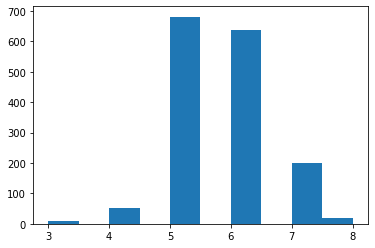

In [73]:
plt.hist(df['quality'])

In [69]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]

In [70]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [74]:
X_ = df.drop(['quality','goodquality'], axis = 1)
y_ = df['goodquality']

In [75]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [76]:
X_ = sc.fit_transform(X_)

In [77]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [78]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train_, y_train_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_ = classifier.predict(X_test_)
cm = confusion_matrix(y_test_, y_pred_)
print(cm)
accuracy_score(y_test_, y_pred_)

[[264   9]
 [ 34  13]]


0.865625

## KNN